# Initial Setup and Data Loading

## Task:
Import necessary libraries and load the dataset.

## Reasoning:
Before we can begin our analysis, we need to import the Python libraries that provide the functions and tools we'll be using, such as pandas for data manipulation, numpy for numerical operations, matplotlib for plotting, and pathlib for working with file paths. We also need to load the dataset from the specified Excel file into a pandas DataFrame so we can work with it in our code.

In [32]:
# 0) Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Data Loading and Initial Inspection

## Task:
Load the dataset from the Excel file and perform an initial inspection of the data.

## Reasoning:
We load the data from the provided Excel file into a pandas DataFrame. To make the column names easier to work with in Python, we clean them by removing leading/trailing whitespace and replacing spaces with underscores. Displaying the head of the DataFrame gives us a quick look at the first few rows and confirms the data has been loaded correctly with the updated column names.

In [33]:
# 1) Load data
df = pd.read_excel("/content/sample_data/Nu-Da-Por-Nu=1000.xlsx")
# Find columns starting with "Unnamed" and drop them
unnamed_cols = [col for col in df.columns if col.startswith('Unnamed')]
df.drop(columns=unnamed_cols, axis=1, inplace=True)
df.columns = [str(c).strip().replace(" ", "_") for c in df.columns]
df.head()

,Da,Por,Nu
0,0.000001,0.2,14.21
1,0.000001,0.2,14.21
2,0.000001,0.2,14.21
3,0.000001,0.2,14.21
4,0.000001,0.2,14.21


## **Idea From Fully_Logged_Analysis**:

**Darcy Number**
**DATASET**: `Nu_Da_Por_Nu=1000.xlsx`

**TARGET**: `"Nu_log"`

**FEATURES**: `['Por_log', 'Por', '1 - Por_log', '1 - Por', 'Da_log', 'Da', 'Da_1 - Por']`

 according to simple multivariate analysis

**MODEL**:

```
GBR =
{
  "MAE": 0.0006559231952546589,
  "RMSE": 0.0010984083147721287,
  "R2": 0.999973131788415
}
```

Best performing with likely good fit.

# Data Overview and Quality Check

## Task:
Get a quick overview of the dataset's structure and check for missing or zero values.

## Reasoning:
Understanding the dimensions and data types of our dataset is crucial before proceeding. We check the shape to see the number of rows and columns, and the data types to ensure they are as expected for numerical analysis. Identifying missing values is important for data cleaning, and checking for zero values can reveal potential issues or characteristics of the data that need to be considered during modeling. Finally, descriptive statistics provide a summary of the central tendency, dispersion, and shape of the dataset's distributions.

In [34]:
# 2) Quick peek
print("Dataset Dimension: ",df.shape)

print("Data Type:\n",df.dtypes)

print("\nMissing values: ")
P = df.columns[df.isna().any()].tolist()
print(f"Columns with missing values: {P}")

print("\nZero values: ")
P = df.columns[(df == 0).any(axis=0)].tolist()
print(f"Columns with zero values: {P}")

print("\nDescriptive statistics: ")
print(df.describe())

Dataset Dimension:  (4000, 3)
Data Type:
 Da     float64
Por    float64
Nu     float64
dtype: object

Missing values: 
Columns with missing values: []

Zero values: 
Columns with zero values: []

Descriptive statistics: 
                Da          Por           Nu
count  4000.000000  4000.000000  4000.000000
mean      0.001090     0.500000    14.146299
std       0.002071     0.223635     0.239153
min       0.000001     0.200000    12.866000
25%       0.000010     0.350000    14.170750
50%       0.000100     0.500000    14.228000
75%       0.001000     0.650000    14.261000
max       0.010000     0.800000    14.297000


# Visualizing Feature Relationships

## Task:
Explore the relationships between the features and the target variable using scatter plots.

## Reasoning:
Visualizing the relationships between variables is a fundamental step in understanding the data and identifying potential patterns or correlations. Pair plots are useful for displaying scatter plots for all pairs of features, allowing us to quickly see how each variable relates to the others. Coloring the points by the target variable ('Nu') can help reveal how the target changes with different combinations of features.

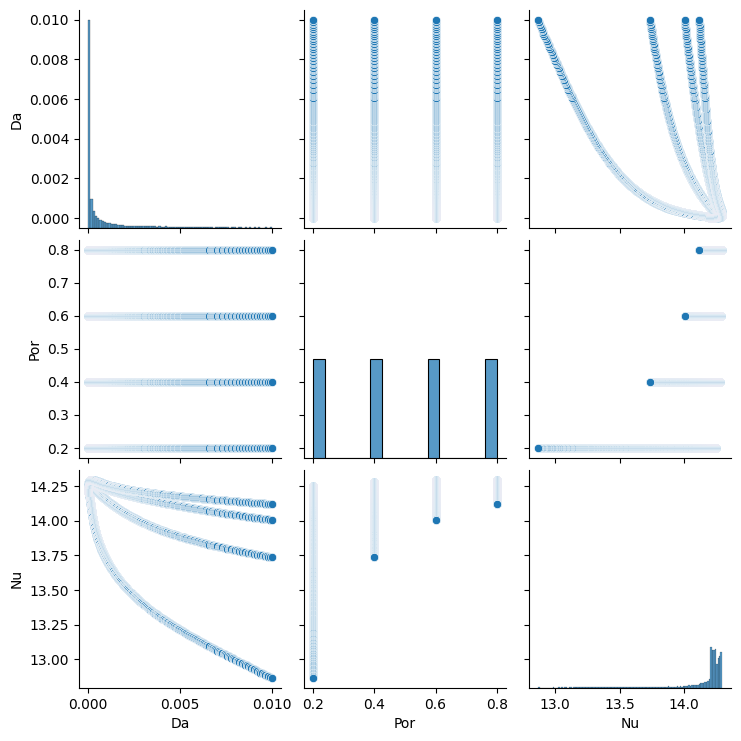

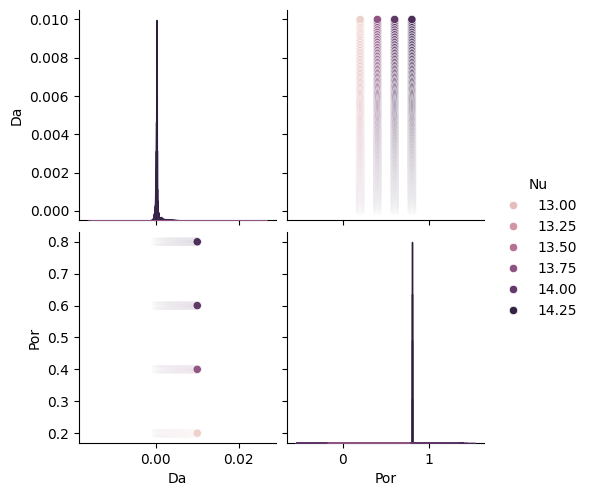

In [35]:
# 3) Visualize relationships
import seaborn as sns

# plot scatter plots to explore relationships between features
sns.pairplot(df)
sns.pairplot(df, hue="Nu")
plt.show()

# Correlation Analysis

## Task:
Quantify the linear relationships between variables using a correlation matrix and visualize it with a heatmap.

## Reasoning:
While scatter plots provide a visual sense of relationships, a correlation matrix provides a numerical measure of the linear correlation between pairs of variables. A heatmap is a great way to visualize this matrix, making it easy to identify strong positive or negative correlations. This helps us understand which features are most strongly related to the target variable and to each other.

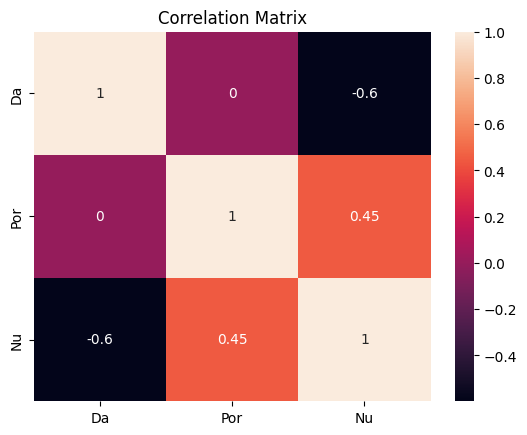

In [36]:
# corelation matrix plot
corr = df.corr().round(4)
sns.heatmap(corr, annot=True).set_title("Correlation Matrix")
plt.show()

# Feature Transformation: Log Scaling

## Task:
Apply a logarithmic transformation to the 'Nu', 'Re', and 'Por' columns.

## Reasoning:
Logarithmic transformations are often applied to skewed data to make it more normally distributed, which can improve the performance of certain machine learning models. It can also help to stabilize the variance of the data. We create new columns with the log-scaled values while keeping the original columns.

Feature Engineering

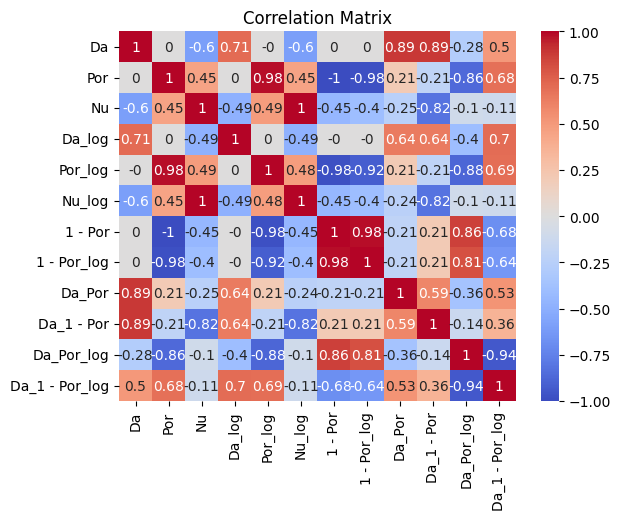

In [37]:
# Feature engineering. Add a few columns to assess importance
'''Interaction terms: Products of existing features (e.g., Re_log * Por_log, Re_log * (1 - Por_log)).
Polynomial features: Higher-order terms of existing features (e.g., Re_log**2, Por_log**2).'''
df["Da_log"] = np.log(df["Da"])
df["Por_log"] = np.log(df["Por"])
df["Nu_log"] = np.log(df["Nu"])

df["1 - Por"] = 1 - df["Por"]
df["1 - Por_log"] = np.log(1 - df["Por"])

df["Da_Por"] = df["Da"] * df["Por"]
df["Da_1 - Por"] = df["Da"] * (1 - df["Por"])
df["Da_Por_log"] = df["Da_log"] * df["Por_log"]
df["Da_1 - Por_log"] = df["Da_log"] * (1 - df["Por_log"])

corr = df.corr().round(2)
sns.heatmap(corr, annot=True, cmap="coolwarm").set_title("Correlation Matrix")
plt.show()

In [38]:
sorted_corr_features = corr['Nu_log'].sort_values(ascending=False)
print(sorted_corr_features)
# list them as column names
# Use list comprehension to filter features based on absolute correlation with Nu_log, excluding Nu and Nu_log
feature_names = [
    index
    for index, value in abs(sorted_corr_features).items()
    if value >= 0.4 and index not in ['Nu', 'Nu_log']
]
print("\nFeatures for Nu_log with absolute correlation >= 0.4 (excluding Nu and Nu_log):")
print(feature_names)

Nu                1.00
Nu_log            1.00
Por_log           0.48
Por               0.45
Da_Por_log       -0.10
Da_1 - Por_log   -0.11
Da_Por           -0.24
1 - Por_log      -0.40
1 - Por          -0.45
Da_log           -0.49
Da               -0.60
Da_1 - Por       -0.82
Name: Nu_log, dtype: float64

Features for Nu_log with absolute correlation >= 0.4 (excluding Nu and Nu_log):
['Por_log', 'Por', '1 - Por_log', '1 - Por', 'Da_log', 'Da', 'Da_1 - Por']


In [39]:
df.head()

,Da,Por,Nu,Da_log,Por_log,Nu_log,1 - Por,1 - Por_log,Da_Por,Da_1 - Por,Da_Por_log,Da_1 - Por_log
0,0.000001,0.2,14.21,-13.815511,-1.609438,2.653946,0.8,-0.223144,2.000000e-07,8.000000e-07,22.235206,-36.050717
1,0.000001,0.2,14.21,-13.806254,-1.609438,2.653946,0.8,-0.223144,2.018600e-07,8.074400e-07,22.220308,-36.026561
2,0.000001,0.2,14.21,-13.797081,-1.609438,2.653946,0.8,-0.223144,2.037200e-07,8.148800e-07,22.205546,-36.002627
3,0.000001,0.2,14.21,-13.787895,-1.609438,2.653946,0.8,-0.223144,2.056000e-07,8.224000e-07,22.190762,-35.978657
4,0.000001,0.2,14.21,-13.778600,-1.609438,2.653946,0.8,-0.223144,2.075200e-07,8.300800e-07,22.175802,-35.954402


# Data Splitting for Model Training and Evaluation

## Task:
Split the dataset into training, validation, and test sets.

## Reasoning:
To train and evaluate our machine learning models effectively, we need to split the data into distinct sets. The training set is used to train the model, the validation set is used to tune hyperparameters and evaluate the model during development, and the test set is used for a final, unbiased evaluation of the best-performing model on unseen data. We use `train_test_split` to achieve a 70/15/15 split as planned.

In [40]:
from sklearn.model_selection import train_test_split

FEATURES = feature_names # according to the correlation multivariate analysis
TARGET = "Nu_log" # based on fully logged analysis


X = df[FEATURES].astype(float)
y = df[TARGET].astype(float)

# Simple 70/15/15 split
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.1765, random_state=42
)

# Confirming Data Split Sizes

## Task:
Print the number of samples in each of the training, validation, and test sets.

## Reasoning:
After splitting the data, it's a good practice to confirm the number of samples in each set to ensure the split was performed correctly according to the desired proportions. This helps in verifying that we have enough data in each set for effective model training and evaluation.

In [41]:
print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (2799, 7)
Validation set size: (601, 7)
Test set size: (600, 7)


# Model Training: Gradient Boosting Regressor

## Task:
Set up and train a Gradient Boosting Regressor model and evaluate its initial performance on the validation set.

## Reasoning:
We choose the Gradient Boosting Regressor as our first model. This is an ensemble method that builds trees sequentially, with each new tree correcting the errors of the previous ones. We create a pipeline to first preprocess the numerical features using StandardScaler and then train the GBR model. Evaluating the model on the validation set gives us an initial idea of its performance before any hyperparameter tuning.

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

preprocess = ColumnTransformer(
    [("num", StandardScaler(), FEATURES)]
)

gbr = GradientBoostingRegressor(
    random_state=42,
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    min_samples_leaf=3,
)

pipe_gbr = Pipeline([("prep", preprocess), ("model", gbr)])

pipe_gbr.fit(X_train, y_train)
pred_val = pipe_gbr.predict(X_val)

mae = mean_absolute_error(y_val, pred_val)
rmse = np.sqrt(mean_squared_error(y_val, pred_val))
r2 = r2_score(y_val, pred_val)
print("GBR_val")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2}")

GBR_val
MAE: 0.0003
RMSE: 0.0005
R2: 0.9994608050963276


# Hyperparameter Tuning for Gradient Boosting Regressor

## Task:
Find the best hyperparameters for the Gradient Boosting Regressor using Randomized Search Cross-Validation.

## Reasoning:
To optimize the performance of the Gradient Boosting Regressor, we tune its hyperparameters. RandomizedSearchCV allows us to efficiently explore a defined range of hyperparameter values and find the combination that yields the best performance on the training data through cross-validation. This helps in finding a model that generalizes well to unseen data.

In [43]:
# fine tuning

from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_gbr = {
    "model__n_estimators": np.arange(150, 501, 50),
    "model__learning_rate": np.logspace(-2.0, -0.2, 6),
    "model__max_depth": [3, 4, 5, 6], # Slightly increased max_depth options
    "model__subsample": [0.7, 0.8, 0.9, 1.0], # Added 0.7, 0.9
    "model__min_samples_leaf": [1, 3, 5], # Reduced options
}

search = RandomizedSearchCV(
    pipe_gbr, param_distributions=param_gbr,
    n_iter=20, cv=5, scoring="neg_mean_absolute_error",
    random_state=42, n_jobs=-1, verbose=1
)
search.fit(X_train, y_train)
best_gbr = search.best_estimator_
print("Best GBR params:", search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best GBR params: {'model__subsample': 0.9, 'model__n_estimators': np.int64(250), 'model__min_samples_leaf': 3, 'model__max_depth': 6, 'model__learning_rate': np.float64(0.12022644346174131)}


In [44]:
pred_val = best_gbr.predict(X_val)
print("GBR_val")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2}")

GBR_val
MAE: 0.0003
RMSE: 0.0005
R2: 0.9994608050963276


# Residual Analysis for Tuned GBR (Validation Set)

## Task:
Visualize the residuals (the difference between actual and predicted values) for the tuned Gradient Boosting Regressor model on the validation set.

## Reasoning:
Residual plots are a valuable tool for assessing the performance of a regression model. By plotting the residuals against the predicted values, we can identify patterns that might indicate issues with the model, such as non-linearity, heteroscedasticity, or outliers. A good residual plot will show residuals randomly scattered around zero.

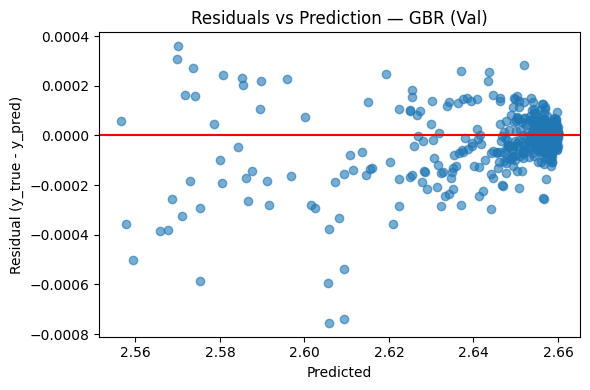

In [45]:
# residual plot for visual accuracy inspection
plt.figure(figsize=(6,4))
residuals = y_val - pred_val
plt.scatter(pred_val, residuals, alpha=0.6)
plt.axhline(0.0, color="red")
plt.xlabel("Predicted")
plt.ylabel("Residual (y_true - y_pred)")
plt.title("Residuals vs Prediction — GBR (Val)")
plt.tight_layout()
plt.show()

# Evaluating Tuned GBR on the Test Set

## Task:
Evaluate the performance of the tuned Gradient Boosting Regressor model on the unseen test set and perform residual analysis.

## Reasoning:
The test set provides an unbiased evaluation of the final model's performance. After tuning the model on the validation set, we evaluate it on the test set to see how well it generalizes to new data it hasn't seen during training or tuning. The residual plot on the test set further helps confirm the model's performance and identify any issues on unseen data.

GBR_test
MAE: 0.0003
RMSE: 0.0005
R2: 0.9994608050963276


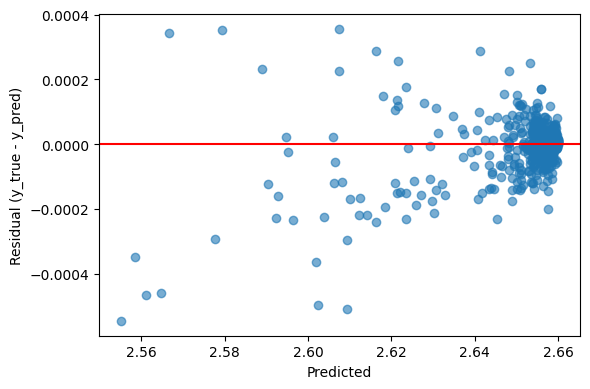

In [46]:
# to test in order to make sure there is no overfitting/underfitting
pred_test = best_gbr.predict(X_test)
print("GBR_test")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2}")

# residual plots
plt.figure(figsize=(6,4))
residuals = y_test - pred_test
plt.scatter(pred_test, residuals, alpha=0.6)
plt.axhline(0.0, color="red")
plt.xlabel("Predicted")
plt.ylabel("Residual (y_true - y_pred)")
plt.tight_layout()
plt.show()

In [47]:
# Check for overfitting and underfitting
print("Train Set:")
print(f"  MAE: {mean_absolute_error(y_train, best_gbr.predict(X_train)):.4f}")
print(f" RMSE: {np.sqrt(mean_squared_error(y_train, best_gbr.predict(X_train))):.4f}")
print(f" R2: {r2_score(y_train, best_gbr.predict(X_train)):.4f}")

print("\nValidation Set:")
print(f"  MAE: {mae:.4f}")
print(f" RMSE: {rmse:.4f}")
print(f" R2: {r2:.4f}")

print("\nTest Set:")
print(f"  MAE: {mean_absolute_error(y_test, pred_test):.4f}")
print(f" RMSE: {np.sqrt(mean_squared_error(y_test, pred_test)):.4f}")
print(f" R2: {r2_score(y_test, pred_test):.4f}")

Train Set:
  MAE: 0.0000
 RMSE: 0.0000
 R2: 1.0000

Validation Set:
  MAE: 0.0003
 RMSE: 0.0005
 R2: 0.9995

Test Set:
  MAE: 0.0001
 RMSE: 0.0001
 R2: 1.0000


# Summary of Findings and Best Model

## Task:
Summarize the key findings from the data analysis and model comparison, and identify the best performing model.

## Reasoning:
To conclude our analysis, we summarize the performance of the models, particularly the tuned MLPRegressor and the Gradient Boosting Regressor. We highlight the key metrics on the test set to clearly show which model performed better and why. This provides a concise overview of our work and the main outcome of the model comparison. We also note that the best model is saved and a prediction script is generated for future use.

In [48]:
# Simple permutation importance works for any model
from sklearn.inspection import permutation_importance

best_model = best_gbr
best_name = "Gradient Boosting Regressor"

r = permutation_importance(best_model, X_val, y_val, n_repeats=10, random_state=42)
imps = pd.Series(r.importances_mean, index=X_val.columns).sort_values(ascending=False)
print("Permutation importance:\n", imps.head(10))

Permutation importance:
 Da_1 - Por     0.903816
Por            0.065513
Por_log        0.060346
1 - Por        0.049886
1 - Por_log    0.027495
Da_log         0.018469
Da             0.015840
dtype: float64


In [49]:
# retrain and test on imps
# To check if they have the same elements regardless of order

if set(feature_names) == set(imps.index):
  print("Results are correct and optimum!")
else:
  best_model.fit(X_train[imps.index], y_train)
  pred_test = best_model.predict(X_test[imps.index])

  print("Test set performance on important features:")
  print(f"  MAE: {mean_absolute_error(y_test, pred_test):.4f}")
  print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, pred_test)):.4f}")
  print(f"  R2: {r2_score(y_test, pred_test):.4f}")

Results are correct and optimum!


In [50]:
import joblib, json

Path("Nu_Da_Por_fluid_ml_outputs").mkdir(parents=True, exist_ok=True)
joblib.dump(best_model, "Nu_Da_Por_fluid_ml_outputs/final_model.joblib")

# If you modeled log(Nu), remember to exponentiate predictions when reporting Nu.

['Nu_Da_Por_fluid_ml_outputs/final_model.joblib']

In [51]:
# Modeled using log(Nu)
with open("/content/Nu_Da_Por_fluid_ml_outputs/best_test_metrics.json", "w") as f:
    json.dump({
        "TARGET": TARGET,
        "FEATURES": list(imps.to_dict().keys()), # Get feature names from dictionary keys
        "MODEL": best_name, # Added MODEL back

        "TEST": {
            "MAE": float(mean_absolute_error(y_test, pred_test)),
            "RMSE": float(np.sqrt(mean_squared_error(y_test, pred_test))),
            "R2": float(r2_score(y_test, pred_test)),
        }
    }, f, indent=2)

The End! Thank you!